# Bigram


## Dataset Analysis


In [1]:
words = open('prenoms.txt', 'r').read().splitlines()
print('Les 5 prénoms les plus populaires : ',words[:5])
print('Les 5 prénoms les moins populaires : ',words[-5:])
print('Le prénom le plus long : ',max(words, key=len))
print('Le prénom le plus court : ',min(words, key=len))


Les 5 prénoms les plus populaires :  ['MARIE', 'JEAN', 'PIERRE', 'MICHEL', 'ANDRÉ']
Les 5 prénoms les moins populaires :  ['ÉLOUEN', 'CHEYNA', 'BLONDIE', 'IMANN', 'GHILAIN']
Le prénom le plus long :  GUILLAUME-ALEXANDRE
Le prénom le plus court :  GUY


In [2]:
unique_characters = set()
for word in words:
  # Ajouter chaque caractère de la ligne à l'ensemble des caractères uniques
  for char in word.strip():
    unique_characters.add(char)
print('Nombre de caractères uniques : ',len(unique_characters))
print('Caractères uniques : ',unique_characters)

Nombre de caractères uniques :  45
Caractères uniques :  {'Ï', 'Ü', 'Ÿ', 'U', 'Ô', 'S', 'Æ', 'À', 'È', '-', 'W', 'H', 'Ê', 'É', 'R', 'M', 'E', 'Ë', 'N', 'Î', 'X', 'Ä', 'F', 'Â', 'K', 'D', 'Ö', 'I', 'J', 'Y', 'A', 'C', 'O', 'Û', 'Ù', 'B', 'Z', 'P', 'T', "'", 'Q', 'Ç', 'G', 'L', 'V'}


## What is a Bigram?


I remind you that the goal of the project is to predict the next character based on the previous ones. In the **bigram** model, we only rely on the previous character to predict the current one. This is the simplest version of this type of model.


Of course, to predict a name, we must start with nothing. To predict the first letter, we need to know the probability that a letter is the first one (and the same for the last letter). Therefore, we add a special character '.' at the beginning and end of each word before constructing our bigrams.


In each name, we have several examples of bigrams (each is independent).
Let's take the first name and look at the number of bigrams it contains:


In [3]:
chs = ['.'] + list(words[0]) + ['.']
for ch1, ch2 in zip(chs, chs[1:]):
  bigram = (ch1, ch2)
  print(bigram)

('.', 'M')
('M', 'A')
('A', 'R')
('R', 'I')
('I', 'E')
('E', '.')


The name "Marie" contains 6 bigrams.


## Counting Method


Let's now create a Python dictionary that groups all the bigrams in the dataset and counts their occurrences.


In [4]:
b = {}
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1
sorted(b.items(), key = lambda kv: -kv[1])
print('Les 5 bigrammes les plus fréquents : ',sorted(b.items(), key = lambda kv: -kv[1])[:5])

Les 5 bigrammes les plus fréquents :  [(('A', '.'), 7537), (('E', '.'), 6840), (('A', 'N'), 6292), (('N', '.'), 3741), (('N', 'E'), 3741)]


We now have our dictionary of bigram frequencies in the entire dataset. As we can see, names often end with A, E, or N, and the letters A and N often follow each other, as do the letters N and E.


### Occurrence Matrix


It is easier to visualize and process the data in matrix form. We will build a 46x46 matrix (45 characters + the special character '.') where the row corresponds to the first letter and the column to the second.


In [5]:
import torch
N = torch.zeros((46, 46), dtype=torch.int32)

We will sort our characters and create lookup tables using Python's dictionary object. We want to be able to convert a character to an integer (for indexing in the matrix) and vice versa (to reconstruct names from integers).


In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

We will now fill our matrix:


In [7]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

And we can now display the matrix (lookup table).


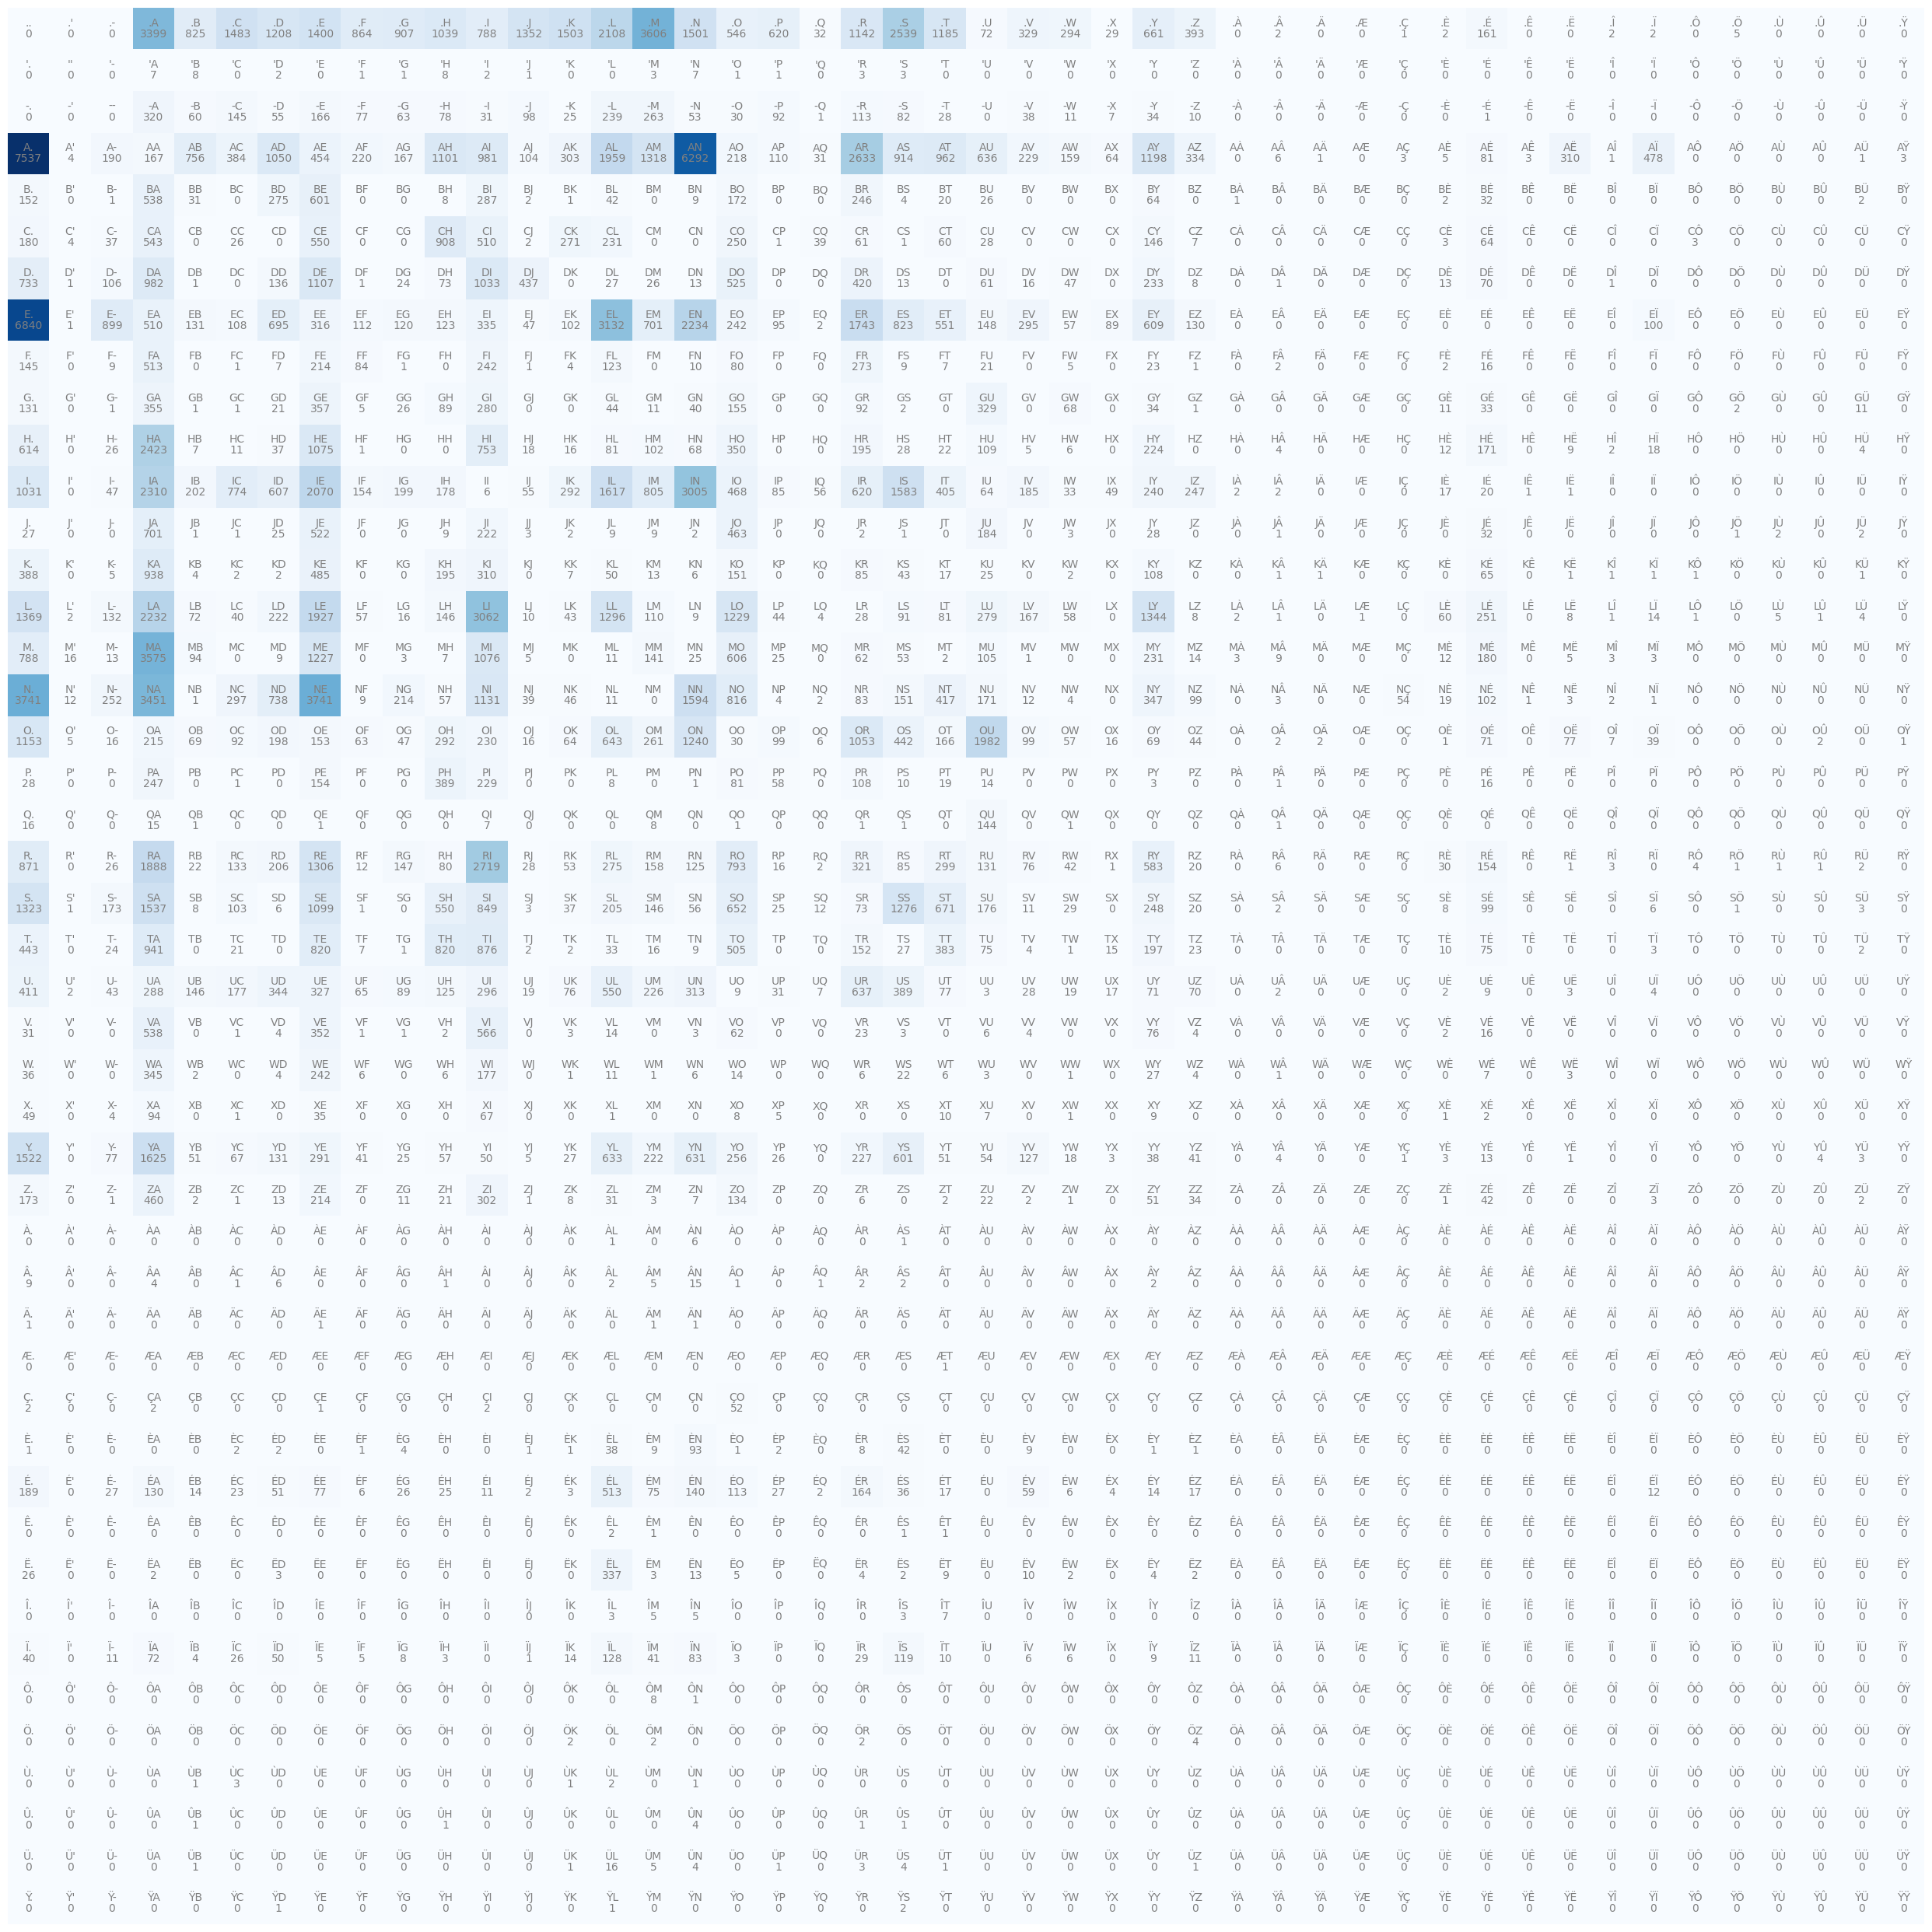

In [10]:
#Code pour dessiner une jolie matrice
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(32,32))
plt.imshow(N, cmap='Blues')
for i in range(46):
  for j in range(46):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

### Probabilities


To know the probability that a name starts with a certain letter, we need to look at the row of the character '.', i.e., row 0, and normalize each value by the sum of the values in that row (to obtain values between 0 and 1 whose sum is equal to 1).


In [15]:
p = N[0].float()
p = p / p.sum()
print("Compte de la première ligne : ",N[0])
print("Probabilités : ",p)

Compte de la première ligne :  tensor([   0,    0,    0, 3399,  825, 1483, 1208, 1400,  864,  907, 1039,  788,
        1352, 1503, 2108, 3606, 1501,  546,  620,   32, 1142, 2539, 1185,   72,
         329,  294,   29,  661,  393,    0,    2,    0,    0,    1,    2,  161,
           0,    0,    2,    2,    0,    5,    0,    0,    0,    0],
       dtype=torch.int32)
Probabilités :  tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1330e-01, 2.7500e-02, 4.9433e-02,
        4.0267e-02, 4.6667e-02, 2.8800e-02, 3.0233e-02, 3.4633e-02, 2.6267e-02,
        4.5067e-02, 5.0100e-02, 7.0267e-02, 1.2020e-01, 5.0033e-02, 1.8200e-02,
        2.0667e-02, 1.0667e-03, 3.8067e-02, 8.4633e-02, 3.9500e-02, 2.4000e-03,
        1.0967e-02, 9.8000e-03, 9.6667e-04, 2.2033e-02, 1.3100e-02, 0.0000e+00,
        6.6667e-05, 0.0000e+00, 0.0000e+00, 3.3333e-05, 6.6667e-05, 5.3667e-03,
        0.0000e+00, 0.0000e+00, 6.6667e-05, 6.6667e-05, 0.0000e+00, 1.6667e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])


To generate names randomly, we do not always want to choose the most probable letter (as we would always generate the same name). We want to choose a letter based on its probability. If the letter 'n' has a probability of 0.1, we want to choose it 10% of the time.
For this, we use the `torch.multinomial` function from PyTorch.


In [16]:
ix = torch.multinomial(p, num_samples=1, replacement=True).item()
itos[ix]

'Z'

With each call, we get a different letter based on its probability of appearing in our test dataset.


With all these elements, we are now ready to generate names from our matrix N. Ideally, we would create a matrix with the probabilities directly to avoid renormalizing each time.


In [17]:
# On copie N et on la convertit en float
P = N.float()
# On normalise chaque ligne
# On somme sur la première dimension (les colonnes)
print("Somme des lignes : ",P.sum(1, keepdims=True).shape)
P /= P.sum(1, keepdims=True) # /= est un raccourci pour P = P / P.sum(1, keepdims=True)
print("Matrice normalisée P est de taille : ",P.shape)
# On vérifie que la somme d'une ligne est égale à 1
print("Somme de la première ligne de P : ",P.sum(1)[0].item())

Somme des lignes :  torch.Size([46, 1])
Matrice normalisée P est de taille :  torch.Size([46, 46])
Somme de la première ligne de P :  1.0


**Note on dividing matrices of different sizes**: As you have noticed, we divide a matrix of size (46,46) by a matrix of size (46,1), which seems impossible. With PyTorch, there are [broadcasting rules](https://pytorch.org/docs/stable/notes/broadcasting.html). I highly recommend familiarizing yourself with this concept, as it is a common source of errors. To understand the broadcasting rules in detail, you can consult the [bonus course](../Bonus_CoursSpécifiques/04_Broadcasting.ipynb).
In practice, dividing a matrix of size (46,46) by a matrix of size (46,1) will "broadcast" the matrix (46,1) to (46,46) by copying the base matrix 46 times. This allows the operation to be performed as desired.


### Generation


It is finally time to generate names with our bigram method!
We will define a function to generate names:


In [18]:
def genName():
  out = []
  ix = 0 # On commence par '.'
  while True: # Tant qu'on n'a pas généré le caractère '.'
    p = P[ix] # On récupère la distribution de probabilité de la ligne correspondant au caractère actuel
    ix = torch.multinomial(p, num_samples=1, replacement=True).item() # On tire un échantillon
    out.append(itos[ix]) # On ajoute le caractère à notre prénom
    if ix == 0:
      break
  return ''.join(out)
genName()

'MARAUSUR.'

For example, we can generate 10 random names:


In [19]:
for i in range(10):
  print(genName())

DA.
TYEYSE-SSCL.
DE.
ANINEDANDVI.
SOKE.
RENNA.
FUXA.
EROA.
FA.
KALEN.


As you can see, the generation is quite poor...
Why? Because the bigram is a very limited method. Relying only on the last character does not provide enough knowledge to generate correct names.


## Model Evaluation


### Maximum Likelihood or Likelihood


We now want to evaluate our model on the training set. For this, we use the maximum likelihood, as in [the second notebook of course 1](../01_Fondations/02_RégressionLogistique.ipynb).
The maximum likelihood or *likelihood* is a measure corresponding to the product of the probabilities of the events. To have a good model, we seek to maximize the *likelihood*.


In [20]:
productOfProbs = 1
for w in words[:2]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    productOfProbs *= prob
    print(f"La probabilité de {ch1}->{ch2} est {prob.item():.3f}")
print("Le produit des probabilités est : ",productOfProbs.item())

La probabilité de .->M est 0.120
La probabilité de M->A est 0.431
La probabilité de A->R est 0.084
La probabilité de R->I est 0.256
La probabilité de I->E est 0.119
La probabilité de E->. est 0.321
La probabilité de .->J est 0.045
La probabilité de J->E est 0.232
La probabilité de E->A est 0.024
La probabilité de A->N est 0.201
La probabilité de N->. est 0.212
Le produit des probabilités est :  4.520583629652464e-10


We quickly see that multiplying probabilities is problematic. Here, we multiply them over 2 of the 30,000 elements of the dataset and get a very small value. If we multiply them over the entire dataset, we get a value that cannot be represented by a computer.


### Log-Likelihood


To solve this precision problem, we use the logarithm for several reasons:
- The log function is monotonic, meaning that if $a > b$, then $log(a) > log(b)$. Maximizing the *log-likelihood* is equivalent to maximizing the *likelihood* in an optimization context.
- An interesting property of logarithms (which explains why this function is often used in optimization and probability) is the following rule: $log(a \times b) = log(a) + log(b)$. This allows us to avoid multiplying small values that could exceed the precision of a computer.


We can therefore maximize the *log-likelihood* rather than the *likelihood*. Let's take the previous loop and see what this gives:


In [21]:
sumOfLogs = 0
for w in words[:2]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    sumOfLogs += torch.log(prob)
print("La somme des log est : ",sumOfLogs.item())

La somme des log est :  -21.517210006713867


We get a much more reasonable value. For optimization problems, we often prefer to have a function to minimize. In the case of a perfect model, each probability is 1, so each log is 0, and the sum of the logs is 0. Otherwise, we get negative values, because a probability is always less than 1 and $log(a) < 0 \text{ if } a < 1$.
To have a minimization problem, we use the *negative log-likelihood*, which simply corresponds to the opposite of the *log-likelihood*.


Often, we take the mean rather than the sum, as it is more readable and equivalent in terms of optimization. And we will calculate it over all the names in the dataset.


In [22]:
sumOfLogs = 0
n=0
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    sumOfLogs += - torch.log(prob)
    n+=1
print("La somme des negative log est : ",sumOfLogs.item())
print("La moyenne des negative log est : ",sumOfLogs.item()/n)

La somme des negative log est :  564925.125
La moyenne des negative log est :  2.4960792002651053


The *negative log-likelihood* of the dataset is therefore 2.49.
You can also see if your name is common or uncommon compared to the dataset average. To do this, simply replace my name "SIMON" with yours (in uppercase).


In [23]:
sumOfLogs = 0
n=0
for w in "SIMON":
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    sumOfLogs += - torch.log(prob)
    n+=1
print("La moyenne des negative log est : ",sumOfLogs.item()/n)

La moyenne des negative log est :  2.598056602478027


If the value of the *negative log-likelihood* corresponding to your name is lower than that of the dataset, your name is quite common. Otherwise, it is rather uncommon.


## Neural Network Approach


### Problem with the "Counting" Approach


We will now try to solve the same problem in a different way. We solved this problem by simply counting the occurrences of bigrams and calculating the probability based on that. This method works for bigrams, but will not work for more complex things like N-grams.


Indeed, our lookup table is 46x46 in size for two characters. If we consider N characters (i.e., N-1 characters to predict the Nth), we immediately have many more possibilities. We can simply calculate that the table will be of size $46^N$. For N=4, this would give a table of size 4,477,456. Suffice it to say that for important context values (today's models have a context of tens of thousands of tokens and there are more than 46 possibilities each time), this approach will not work at all.


This is why the neural network approach is very interesting. In the rest of the course, we will show how to solve the same problem using a neural network, which will give you an intuition about the network's capabilities as the context increases.


### Dataset for Our Neural Network


Our neural network will receive a character as input and will have to predict the next character. As a loss function, we can use the *negative log-likelihood* function to try to get close to the value of the bigram by "counting".


Let's start by creating our training dataset. We take the loop for traversing bigrams from the previous part and this time, we index two lists: `xs` for the inputs and `ys` for the labels.


In [18]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. M
M A
A R
R I
I E
E .


In [19]:
print("valeurs d'entrée : ",xs)
print("valeurs de sortie : ",ys)

valeurs d'entrée :  tensor([ 0, 15,  3, 20, 11,  7])
valeurs de sortie :  tensor([15,  3, 20, 11,  7,  0])


For the input value 0, which corresponds to '.', we want to predict a label 15, which corresponds to 'M'.


The problem with these lists is that they contain integers, and it is not possible to give an integer as input to a neural network. In the field of NLP, we often use *one-hot encoding*, which consists of converting an index into a vector of 0s with a 1 at the index position. The size of the vector corresponds to the number of possible classes, which is 46 here.


In [20]:
import torch.nn.functional as F
# one-hot encoding
xenc = F.one_hot(xs, num_classes=46).float() # conversion en float pour le NN
print("Encodage one-hot des deux premiers caractères: ",xenc[:2])

Encodage one-hot des deux premiers caractères:  tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


As you can see, we have a 1 at position 0 of the first vector and a 1 at position 15 of the second. These are the vectors that will serve as input to our neural network. We can visualize what these vectors look like to better understand what *one-hot encoding* does.


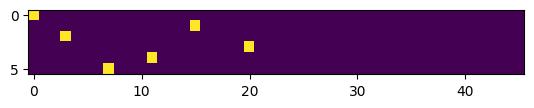

In [21]:
# Les 5 premiers vecteurs one-hot
plt.imshow(xenc)

### Our Neural Network


We will now create our neural network. It will be an extremely simple neural network containing a single layer. For the layer size, we take a vector of size $n \times 46$ as input, so the first dimension will be of size 46. In output, we want a probability distribution over all characters. Our network layer will therefore be of size $46 \times 46$.


Let's start by initializing our layer with random values:


In [22]:
# On met le paramètre requires_grad à True pour pouvoir optimiser la matrice par descente de gradient
W = torch.randn((46, 46), requires_grad=True) 

The *forward* of our neural network will simply consist of a matrix multiplication between the input and the layer. We will then apply the *softmax* function (see CNN course) to obtain a probability distribution.


In [23]:
# One hot encoding sur les entrées
xenc = F.one_hot(xs, num_classes=46).float() 
# Multiplication matricielle (forward pass)
logits = xenc @ W  # @ est la multiplication matricielle
#Softmax pour obtenir des probabilités
counts = logits.exp() 
probs = counts / counts.sum(1, keepdims=True) 
print(probs.shape)


torch.Size([6, 46])


We obtain a probability distribution for each of our 6 characters. We will visualize the outputs of our untrained neural network and calculate the *negative log-likelihood* to see where we stand compared to our model obtained by "counting".


In [24]:
nlls = torch.zeros(6)
for i in range(6):
  x = xs[i].item() # index de l'entrée
  y = ys[i].item() # index du label
  print('--------')
  print(f'bigramme actuel {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('entrée du réseau de neurones :', x)
  print('sortie du réseau (probabilité) :', probs[i])
  print('vrai label :', y)
  p = probs[i, y]
  print('probabilité donné par le réseau sur le caractère réel :', p.item())
  logp = torch.log(p)
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('negative log likelihood moyen, i.e. loss =', nlls.mean().item())

--------
bigramme actuel 1: .M (indexes 0,15)
entrée du réseau de neurones : 0
sortie du réseau (probabilité) : tensor([0.0146, 0.0210, 0.0823, 0.0077, 0.0160, 0.0483, 0.0943, 0.0204, 0.0079,
        0.0112, 0.0085, 0.0179, 0.0188, 0.0292, 0.0022, 0.0092, 0.0200, 0.0094,
        0.0097, 0.0191, 0.1091, 0.0122, 0.0092, 0.0287, 0.0120, 0.0088, 0.0053,
        0.0217, 0.0177, 0.0050, 0.0038, 0.0483, 0.0320, 0.0441, 0.0105, 0.0126,
        0.0266, 0.0092, 0.0262, 0.0081, 0.0430, 0.0012, 0.0102, 0.0025, 0.0126,
        0.0116], grad_fn=<SelectBackward0>)
vrai label : 15
probabilité donné par le réseau sur le caractère réel : 0.009214116260409355
negative log likelihood: 4.687018394470215
--------
bigramme actuel 2: MA (indexes 15,3)
entrée du réseau de neurones : 15
sortie du réseau (probabilité) : tensor([0.0574, 0.1353, 0.0227, 0.0032, 0.1142, 0.0148, 0.1007, 0.0162, 0.0242,
        0.0089, 0.0040, 0.0459, 0.0023, 0.0081, 0.0064, 0.0124, 0.0083, 0.0112,
        0.0172, 0.0062, 0.0033, 0.0

For the loss calculation, we will calculate the *negative log-likelihood* of the output of our network with respect to the label as follows:


In [25]:
# Calcul de la loss
loss = -probs[torch.arange(6), ys].log().mean()
print(loss.item())
# On remet les gradients à zéro (None est plus efficace)
W.grad = None 
# Calcul des gradients automatique de pytorch
loss.backward()
print(W.grad)

4.670102596282959
tensor([[0.0024, 0.0035, 0.0137,  ..., 0.0004, 0.0021, 0.0019],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])


As you can see, we have calculated the gradients of our matrix W with respect to the *loss*. In the same way as in previous courses, we can update the model weights in the direction of the gradient with a step (the *learning_rate*).


In [26]:
# avec un learning_rate de 0.1
W.data += -0.1 * W.grad

### Optimization


Based on everything we have just seen, we can now gather the elements and optimize our model.


**Creating the Complete Dataset**
We will start by creating our complete dataset by taking the previous loop, but traversing all the names.


In [27]:
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)


number of examples:  226325


**Model Initialization**
We can now initialize our model as before, choose the *learning_rate* and the number of iterations.


In [28]:
W = torch.randn((46, 46), requires_grad=True)
lr=50 # en pratique, dans ce petit problème, un learning rate de 50 fonctionne bien ce qui peut sembler étonnant
iterations=100

**Gradient Descent**
Let's now apply the gradient descent algorithm to our model.


In [29]:
# Descente du gradient
for k in range(iterations):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=46).float() # transformation one hot sur les entrées
  logits = xenc @ W
  probs=F.softmax(logits,dim=1) # On applique le softmax
  loss = -probs[torch.arange(num), ys].log().mean() # Calcul du negative log likelihood (loss)
  if k%10==0:
    print('loss iteration '+str(k)+' : ',loss.item())
  
  # retropropagation
  W.grad = None # Remettre la gradient à zéro à chaque itération (à ne pas oublier !!!!)
  loss.backward()
  
  # Mise à jour des poids
  W.data += -50 * W.grad

loss iteration 0 :  4.346113204956055
loss iteration 10 :  2.94492769241333
loss iteration 20 :  2.7590363025665283
loss iteration 30 :  2.6798315048217773
loss iteration 40 :  2.637108087539673
loss iteration 50 :  2.610524892807007
loss iteration 60 :  2.5923469066619873
loss iteration 70 :  2.5791807174682617
loss iteration 80 :  2.569261074066162
loss iteration 90 :  2.561541795730591


After 100 iterations, we get a *negative log-likelihood* close to that of the "counting" model. This is in fact the maximum capacity of the bigram model on the training data.


**Generating Names with Our Model**
We can now generate names with our model.


In [30]:
for i in range(5):
  
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=46).float()
    logits = xenc @ W 
    # Prédiction des probabilités de la lettre suivante
    p=F.softmax(logits,dim=1)
    
    # On fait un tirage aléatoire de la prochaine lettre en suivante la distribution p 
    ix = torch.multinomial(p, num_samples=1, replacement=True).item()
    # Conversion en lettre
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

JE.
S.
ADJULA.
M.
LVERTYÜCI.


### Additional Notes


The weight matrix $W$ is the same size as the matrix $N$ used in the counting method. What we have just achieved with the neural network approach is in fact the learning of the matrix $N$.
We can confirm this intuition by looking at what happens when we perform the operation `xenc @ W`. This is a matrix multiplication of a row matrix of size $1 \times 46$ by a square matrix of size $46 \times 46$. Moreover, the row matrix contains only zeros, except for a 1 at the index $i$ of the letter. This matrix multiplication results in the row $i$ of the matrix $W$.
This corresponds exactly to what we did in the counting method, where we retrieved the probabilities from row $i$ of $P$.
